In [1]:
%cd ..

/home/ubuntu/AIVN-materials/image_analysis


In [40]:
import math
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn

from model import ClassificationModel
from data import FlowerDataModule

In [59]:
def visualize_activations(model, dataloader, color="C0"):
    activations = {}

    model.eval()
    # small_loader = data.DataLoader(train_set, batch_size=1024)
    (imgs, labels), _ = next(iter(dataloader))
    with torch.no_grad():
        layer_index = 0
        # imgs = imgs.to(device)
        imgs = imgs.view(imgs.size(0), -1)
        # We need to manually loop through the layers to save all activations
        for layer_index, layer in enumerate(model):
            imgs = layer(imgs)
            activations[layer_index] = imgs.view(-1).cpu().numpy()

    ## Plotting
    columns = 4
    rows = math.ceil(len(activations)/columns)
    print(rows)
    fig, ax = plt.subplots(rows, columns, figsize=(columns*2.7, rows*2.5), squeeze=False)
    fig_index = 0
    for key in activations:
        key_ax = ax[fig_index//columns][fig_index%columns]
        sns.histplot(data=activations[key], bins=50, ax=key_ax, color=color, kde=True, stat="density")
        key_ax.set_title(f"Layer {key} - {model[key].__class__.__name__}")
        fig_index += 1
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.show()
    plt.close()

In [11]:
data_dir = "/home/ubuntu/splitted_flowers"
ckpt_path =  "/home/ubuntu/AIVN-materials/image_analysis/logs/vanila_mlp/lightning_logs/version_14/Flower Classification/alzo07i4/checkpoints/epoch=39-step=3799-val_loss=0.00.ckpt"
dm = FlowerDataModule(data_dir=data_dir)
model = ClassificationModel().load_from_checkpoint(checkpoint_path=ckpt_path)

In [50]:
all_layers = [layer for seq in model.model.layers[:-1] for layer in seq]
model = nn.Sequential(*all_layers)

3


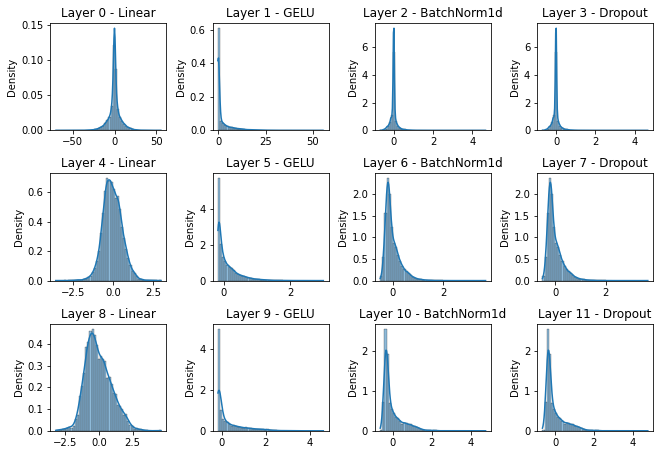

In [60]:
visualize_activations(model, dm.train_dataloader())

In [21]:
len(next(iter(dm.train_dataloader())))

2